# Input Model Saved

In [ ]:
import pandas as pd
from google.colab import drive
import os

drive.mount('/content/drive')
model_path="/content/drive/My Drive/Model"

Mounted at /content/drive


In [ ]:
import tensorflow as tf

cnn_model = tf.keras.models.load_model(os.path.join(model_path, "/content/drive/MyDrive/Model/cnn_model.h5"))
# resnet_model = tf.keras.models.load_model(os.path.join(model_path, "/content/drive/MyDrive/Model/resnet_model.h5"))
# You can now use the model for prediction or further training.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Evaluasi Matrix (Counfusion Matrix)

Found 1600 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 374s 8s/step


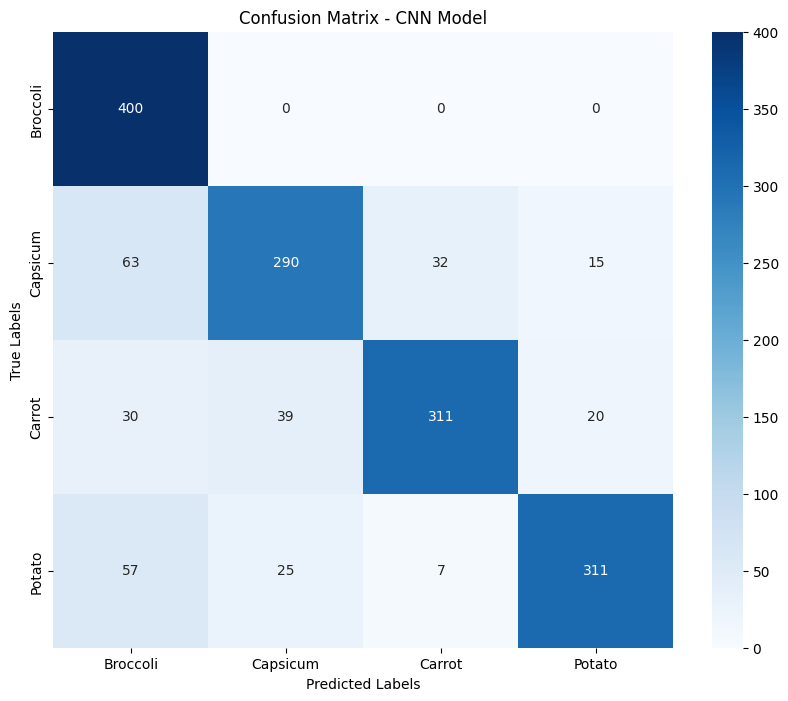

In [ ]:
import pandas as pd
from google.colab import drive
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have image data generators for your test data
# Replace these with your actual test data generators
# Make sure your generators are properly configured with image size and preprocessing steps consistent with training

# Load and preprocess test data.
test_dir = '/content/drive/MyDrive/Code-PCD/Dataset/Cleaned/vegie-cleaned'  # Replace with the actual path to your test data directory
image_size = (224, 224)  # Replace with your model input image size

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # Adjust rescaling if necessary

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,  # Adjust if needed
    class_mode='categorical',  # Assumes categorical classification
    shuffle=False # Important: do not shuffle for correct confusion matrix mapping
)

# Evaluate CNN Model
cnn_predictions = cnn_model.predict(test_generator)
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)
cnn_true_classes = test_generator.classes

# Confusion Matrix for CNN Model
cnn_cm = confusion_matrix(cnn_true_classes, cnn_predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN Model')
plt.show()

In [ ]:
# prompt: tampilkan classification report dari confusion matrix

from sklearn.metrics import classification_report

# Classification Report for CNN Model
cnn_report = classification_report(cnn_true_classes, cnn_predicted_classes, target_names=list(test_generator.class_indices.keys()))
print("Classification Report (CNN):\n", cnn_report)

Classification Report (CNN):
               precision    recall  f1-score   support

    Broccoli       0.73      1.00      0.84       400
    Capsicum       0.82      0.72      0.77       400
      Carrot       0.89      0.78      0.83       400
      Potato       0.90      0.78      0.83       400

    accuracy                           0.82      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.83      0.82      0.82      1600



# akurasi, presisi, recall, dan f1 score nya

In [ ]:
# prompt: berapa akurasi, presisi, recall, dan f1 score nya

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming cnn_predicted_classes and cnn_true_classes are already defined from your previous code

# Calculate metrics
accuracy = accuracy_score(cnn_true_classes, cnn_predicted_classes)
precision = precision_score(cnn_true_classes, cnn_predicted_classes, average='weighted') # Use 'weighted' for multiclass
recall = recall_score(cnn_true_classes, cnn_predicted_classes, average='weighted') # Use 'weighted' for multiclass
f1 = f1_score(cnn_true_classes, cnn_predicted_classes, average='weighted') # Use 'weighted' for multiclass

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.82
Precision: 0.8334742815070041
Recall: 0.82
F1 Score: 0.8186123816449765


# Prediksi


Predictions using CNN model:


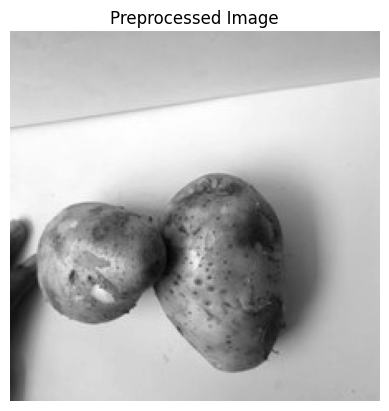

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Potato
Class probabilities:
Broccoli: 1.02%
Capsicum: 10.71%
Carrot: 22.57%
Potato: 65.69%


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define constants for image size (adjust based on model input requirements)
IMG_WIDTH = 224  # Replace with the required width
IMG_HEIGHT = 224  # Replace with the required height

def preprocess_image_manual(image_path):
    # Load the image
    img = cv2.imread(image_path)  # Load image in BGR format
    if img is None:
        raise ValueError("Image not found or path is incorrect")

    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized_img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

    # Normalize the image
    normalized_img = resized_img / 255.0

    # Add channel dimension for grayscale
    preprocessed_img = np.stack([normalized_img, normalized_img, normalized_img], axis=-1) # Modification here

    # Expand dimensions to fit the model input shape
    preprocessed_img = np.expand_dims(preprocessed_img, axis=0)  # Add batch dimension

    # Display the preprocessed image
    plt.imshow(normalized_img, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()

    return preprocessed_img

def predict_image_manual(image_path, model, class_labels):
    # Preprocess the image
    preprocessed_img = preprocess_image_manual(image_path)

    # Predict the class probabilities
    classes = model.predict(preprocessed_img, batch_size=1)

    # Convert probabilities to percentages
    percentages = classes[0] * 100

    # Get the predicted class index
    predicted_class = np.argmax(classes)

    predicted_label = class_labels[predicted_class]

    print(f"Predicted class: {predicted_label}")
    print("Class probabilities:")
    for label, percentage in zip(class_labels, percentages):
        print(f"{label}: {percentage:.2f}%")

# Example usage (replace with your image path and class labels)
image_path_to_predict = "/content/drive/MyDrive/Dataset/test data/potato2.jpg"  # Update with the path to your image

# Define class labels (replace with your actual labels)
class_labels_resnet = ['Broccoli', 'Capsicum', 'Carrot', 'Potato']  # Replace with ResNet class labels
class_labels_cnn = ['Broccoli', 'Capsicum', 'Carrot', 'Potato']    # Replace with CNN class labels

# Predict using "model"
# print("Predictions using ResNet model:")
# predict_image_manual(image_path_to_predict, model, class_labels_resnet)

# Predict using "cnn_model"
print("\nPredictions using CNN model:")
predict_image_manual(image_path_to_predict, cnn_model, class_labels_cnn)
